# 받은 CSV파일 읽어오기 + Merge하기

In [2]:
import pandas as pd
data_mean = pd.read_csv("data_mean.csv")
nasdaq_mean = pd.read_csv("NASDAQdata_mean.csv")

In [3]:
df=pd.DataFrame()

In [4]:
df['col1'] = data_mean[['0']]
df['col2'] = nasdaq_mean[['0']]

In [5]:
df

,col1,col2
0,1.550000e+11,8.788709e+08
1,1.940000e+11,9.712699e+08
2,2.130000e+11,1.230772e+09
3,1.990000e+11,1.081887e+09
4,1.940000e+11,1.108768e+09
...,...,...
143,1.757835e+09,1.203887e+08
144,2.063791e+09,1.796066e+08
145,2.121892e+09,7.793927e+07
146,1.927385e+09,1.743730e+08


In [6]:
import numpy as np

In [7]:
corr_matrix = np.corrcoef(df['col1'], df['col2'])
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)

0.8888301074040387


In [8]:
def pearson_similarity(a, b):
    return np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))

In [9]:
pearson_similarity(df['col1'],df['col2'])

0.9427778674767662

In [10]:
pearson_similarity(df['col1'],df['col2'])**2

0.8888301074040389

# Correlation Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

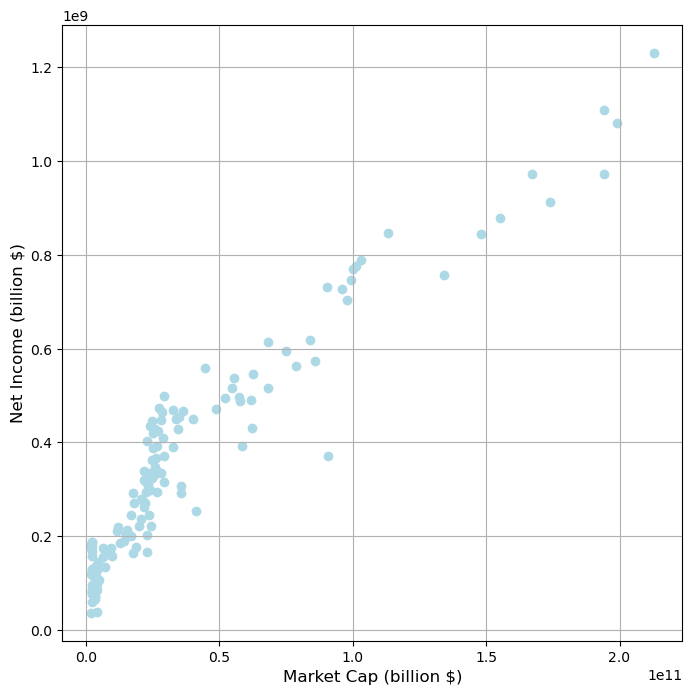

In [79]:
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#df['col1']은 Market Cap, df['col2']은 Net income
#pearson linear regression

fig, ax = plt.subplots(figsize = ( 8 , 8 ))



plt.scatter(df['col1'],df['col2'],color='lightblue')
ax.set_xlabel("Market Cap (billion $)" , size = 12 )
ax.set_ylabel("Net Income (billion $)" , size = 12 )
plt.grid()
plt.show




<function matplotlib.pyplot.show(close=None, block=None)>

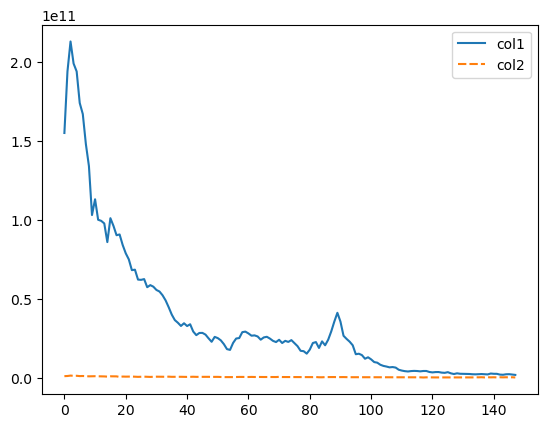

In [50]:
# sns.lineplot(data=df['col1'])
#여기서 x축만 quarter로 바꿔줘야됨
sns.lineplot(data=df)
plt.show

In [53]:
df2=pd.DataFrame()

In [54]:
df2['date'] = data_mean[['1']]
df2['data_mean'] = data_mean[['0']]
df2['nasdaq_mean'] = nasdaq_mean[['0']]

In [63]:
df2

,date,data_mean,nasdaq_mean
0,2022-06-01,1.550000e+11,8.788709e+08
1,2022-03-01,1.940000e+11,9.712699e+08
2,2021-12-01,2.130000e+11,1.230772e+09
3,2021-09-01,1.990000e+11,1.081887e+09
4,2021-06-01,1.940000e+11,1.108768e+09
...,...,...,...
143,1986-09-01,1.757835e+09,1.203887e+08
144,1986-06-01,2.063791e+09,1.796066e+08
145,1986-03-01,2.121892e+09,7.793927e+07
146,1985-12-01,1.927385e+09,1.743730e+08


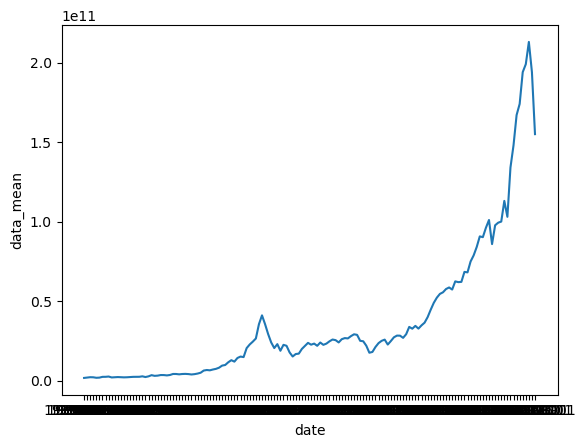

<Figure size 1500x800 with 0 Axes>

In [76]:
df3=df2.iloc[::-1]
sns.lineplot(x = df3['date'], y = df3['data_mean'],data = df3)
plt.figure(figsize = (15,8))
plt.show()

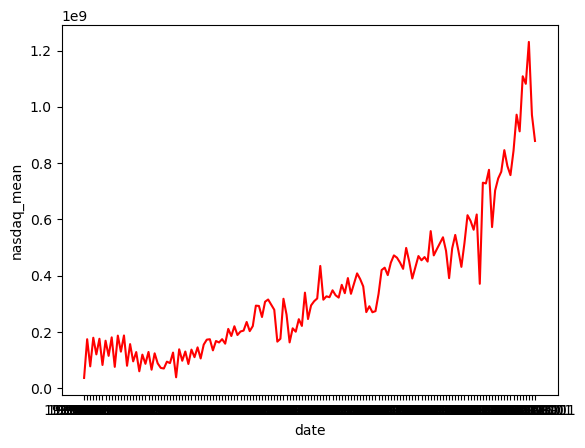

<Figure size 1500x800 with 0 Axes>

In [78]:
sns.lineplot(x = df3['date'], y = df3['nasdaq_mean'],data = df3, color='red')
plt.figure(figsize = (15,8))
plt.show()

In [64]:
df2['date']

0      2022-06-01
1      2022-03-01
2      2021-12-01
3      2021-09-01
4      2021-06-01
          ...    
143    1986-09-01
144    1986-06-01
145    1986-03-01
146    1985-12-01
147    1985-09-01
Name: date, Length: 148, dtype: object